In [1]:
import pandas as pd

In [2]:
house =pd.read_csv('data.csv')
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.00000,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
house["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613470,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601568,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# house.hist(bins=50,figsize=(20,15))
# plt.show()

## train test splitting


In [7]:
import numpy as np

def split_train_test(data,test_ratio):
    np.random.seed(24)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [8]:
train_set,test_set=split_train_test(house,0.2)

[368 105 269 119 351 189 172 136  32   3 241  31 244  81 270   6 201 266
 157   5 135 481 413 116 493 184   0 278 450  77  90 218 265 402 147 111
 488 130 232 502 328  88 377  17 299 404  19 501  37  29  70 200 267  22
 296 308 498 462 320 408 448 426 358  25 453 405 213 443 449 386 222 480
 464  61 412 271 275  68 285 352 417 317 442 165 103 473 380 427 394 472
 467 206 126  44 179 202 505 100  82 226 416  84 456 118 477  76 104 370
  59  57 205 153 440 309 236 345 142 177 304 282 251 454 436 187 219 216
  48 428  79 319 310 461 256 489  72 295 463  40 344  46 393 197 211  16
  15 446 152 406  51 504 324 500  64 238  94 132 366 400  97 451 196 154
 260 115  14 188  71 161  23 127 210 131 155 162 441  65 490 114 486 314
  47 125 396 369 158 148 108 124 475  54 357 460 248 437 239 339 376 335
 203 169 495 398 362  26 185 146 311 468 485  78 186 121 220 215 465 306
  13  80 457 150 139 280 492 237 322 364 365 385  91 471 491  30 333 430
 359 438 252 378 421 249 397 138 141 307 113 411 38

In [9]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:405
Rows in test set:101



In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(house,test_size=0.2,random_state=24)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=24)
for train_index,test_index in split.split(house,house['CHAS']):
    strat_train_set=house.loc[train_index]
    strat_test_set=house.loc[test_index]

In [12]:
 strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
 strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
# 95/7
# 376/28

In [15]:
house= strat_train_set.copy()

##looking for correlations

In [16]:
corr_matrix=house.corr()

In [17]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.697012
ZN         0.346538
B          0.320943
DIS        0.193358
CHAS       0.179838
AGE       -0.341311
RAD       -0.350928
CRIM      -0.360527
NOX       -0.396309
TAX       -0.452105
INDUS     -0.468746
PTRATIO   -0.512794
LSTAT     -0.729451
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203E48DAEB0>,
      dtype=object)

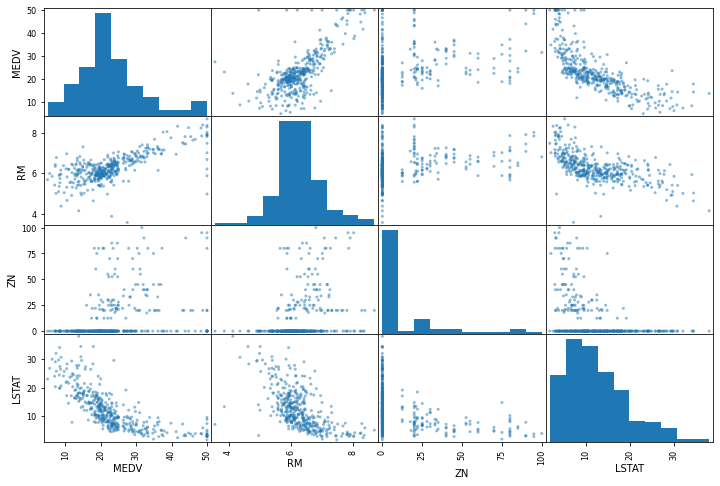

In [18]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(house[attributes],figsize=(12,8))

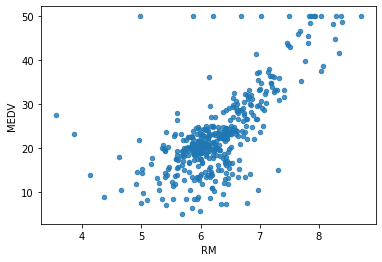

In [19]:
house.plot(kind="scatter",x='RM',y='MEDV',alpha=0.8)

## trying out attribute combination

In [20]:

house["tpm"]=house["TAX"]/house["RM"]

In [21]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,tpm
276,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254,17.6,389.25,6.05,33.2,34.952525
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1,62.471500
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6,37.558685
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1,38.970588
242,0.10290,30.0,4.93,0,0.428,6.358,52.9,7.0355,6,300,16.6,372.75,11.22,22.2,47.184649


In [22]:
corr_matrix=house.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.697012
ZN         0.346538
B          0.320943
DIS        0.193358
CHAS       0.179838
AGE       -0.341311
RAD       -0.350928
CRIM      -0.360527
NOX       -0.396309
TAX       -0.452105
INDUS     -0.468746
PTRATIO   -0.512794
tpm       -0.514295
LSTAT     -0.729451
Name: MEDV, dtype: float64

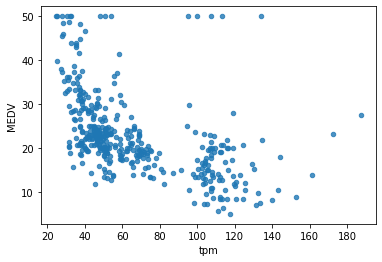

In [23]:
house.plot(kind="scatter",x="tpm",y="MEDV",alpha=0.8)

In [24]:
house=strat_train_set.drop('MEDV',axis=1)
house_labels=strat_train_set["MEDV"].copy()

In [25]:
# to take care of missing attributes we have three optins.
#1. get rid of missing data points.
#2. get rid of the whole attribute.
#3. set the value to some values(0 ,mean or median).



In [26]:
# option 1
a=house.dropna(subset=["RM"])
a.shape

(404, 13)

In [27]:
# option 2
house.drop("RM",axis=1).shape

(404, 12)

In [28]:
# option3
median=house["RM"].median() # computing median for option 3.
house["RM"].fillna(median)

276    7.267
351    6.579
57     6.816
193    6.800
242    6.358
       ...  
32     5.950
45     5.682
35     5.933
477    5.304
1      6.421
Name: RM, Length: 404, dtype: float64

In [29]:
# house.shape

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(house)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.29015e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.32000e-01,
       6.20550e+00, 7.62500e+01, 3.29860e+00, 5.00000e+00, 3.29000e+02,
       1.88500e+01, 3.92045e+02, 1.06100e+01])

In [32]:
X=imputer.transform(house)

In [33]:
house_tr=pd.DataFrame(X,columns=house.columns)

In [34]:
house_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [35]:
house_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.297293,11.162129,10.925446,0.069307,0.551039,6.284889,68.143564,3.805468,9.138614,400.757426,18.387624,359.627698,12.343317
std,8.492157,22.374000,6.848338,0.254290,0.114741,0.694356,27.654221,2.047852,8.476831,166.396222,2.191840,87.749116,6.991196
min,0.000000,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.448000,5.895750,45.475000,2.110500,4.000000,277.000000,17.200000,376.745000,7.092500
50%,0.229015,0.000000,8.560000,0.000000,0.532000,6.205500,76.250000,3.298600,5.000000,329.000000,18.850000,392.045000,10.610000
75%,2.745413,18.500000,18.100000,0.000000,0.624000,6.620500,93.100000,5.234500,8.000000,666.000000,20.200000,396.232500,16.305000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.704000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-Learn Design

# primarily there are three types of objects
#1. estimaters=it estimates some parameter based on a dataset,eg. imputer it has a fit method which fits the datasets.
#2.Tranformers= It takes input and returns output based on the learning from fit().
#It also has a convinience function which fits and then transforms.
#3.Predictors=For example linear regression is an exmaple of predictors .
 it also give score function which will evaluate the predictions.

## feature scalling

In [36]:
#primarily there are two types of feature scalling methods:
# 1. Min-Max scalling (Normalization)
# (value - min)/(max - min)
# skalearn provides a class called minmaxscalar for this
# Standardization 
# (value-mean)/std
# Sklearn provides a class called standard scalar for this

## creating a pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std.scaler",StandardScaler())
])

In [38]:
house_num_tr=my_pipeline.fit_transform(house_tr)

In [39]:
house_num_tr.shape

(404, 13)

## selecting a desired model for the company

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model= DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(house_num_tr,house_labels)


RandomForestRegressor()

In [41]:
some_data = house.iloc[:5]

In [42]:
some_labels = house_labels.iloc[:5]

In [43]:
prepared_data=my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([34.361, 25.39 , 30.911, 29.638, 22.143])

In [45]:
list(some_labels)

[33.2, 24.1, 31.6, 31.1, 22.2]

In [46]:
from sklearn.metrics import mean_squared_error
house_prediction=model.predict(house_num_tr)
lin_mse=mean_squared_error(house_labels,house_prediction)
lin_rmse=np.sqrt(lin_mse)

In [47]:
lin_rmse

1.2308268180132373

## using better evaluation technique 
##cross validation

In [48]:
# 1 2 3  4 5 56 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,house_num_tr,house_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [49]:
rmse_scores

array([2.31582741, 2.63398163, 2.98708559, 2.97962186, 3.10544129,
       3.27384057, 5.28893571, 2.98414167, 2.93453022, 2.89850125])

In [50]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [51]:
print(print_scores(rmse_scores))

scores [2.31582741 2.63398163 2.98708559 2.97962186 3.10544129 3.27384057
 5.28893571 2.98414167 2.93453022 2.89850125]
mean 3.1401907207367374
standard deviation 0.758042362559953
None


## saving the model

In [52]:
from joblib import dump ,load
dump(model,"real_estate.joblib")

['real_estate.joblib']

## testing the model

In [54]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [56]:
final_rmse
print(final_predictions,list(y_test))

[17.064 20.049 11.489 32.25  13.507 19.42  17.862 20.958 22.606 17.009
 21.27  10.37  23.472 14.981 14.788 24.681 21.054 43.834 21.95  13.258
 25.744 32.887 23.368 16.1   26.428 13.192 30.908 22.179 24.129  9.863
 11.194 21.724 19.816 18.953 12.596 15.519 28.05  21.939 22.137 12.031
 14.878 22.484 23.015 48.331 17.956 34.116 20.829 20.081 24.163 28.675
 14.05  33.238 16.841 26.772 21.957 20.159  8.883 24.138 16.816 12.214
 19.618 10.479 20.885 41.705 14.683 19.757 34.572 15.308 31.365 22.347
  8.405 18.304 46.267 23.223 27.311 13.728 19.314 34.901 10.15  17.657
 15.301  7.378  9.583 42.266 20.698 17.815 16.309 33.085 22.789 24.884
 19.119 20.038 20.319  9.965 24.616 19.071 19.91  31.664 32.472 20.044
 23.438 11.279] [17.3, 16.2, 12.8, 15.0, 14.9, 20.4, 27.5, 20.5, 21.4, 17.0, 19.3, 10.8, 25.0, 10.2, 14.1, 25.3, 21.7, 50.0, 22.0, 12.5, 22.0, 34.6, 22.9, 15.6, 24.8, 9.6, 28.5, 19.1, 23.7, 10.9, 8.4, 20.1, 18.4, 17.8, 13.4, 16.4, 23.9, 21.2, 22.6, 13.3, 13.1, 21.4, 24.4, 50.0, 16.5, 35.4,

In [59]:
prepared_data[0]

array([-0.37641342,  1.29049918, -0.6601666 ,  3.66450153, -0.90785283,
        1.41617451, -0.69310581,  0.47999026, -0.60694677, -0.88306929,
       -0.35978914,  0.33799806, -0.90129356])

## END OF THE